In [2]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
import sklearn
import seaborn as sns


#SKlearn Stuff
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
#helpers
%matplotlib inline

In [13]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [14]:
credit = pd.read_sql('SELECT * FROM credit', con=connection)

C:\Users\pagaddam\Anaconda3\envs\DataScience\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [15]:
credit.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [16]:
credit = credit.drop(index = 2398)
# observed that the header row is duplicated at row index 2398. so cleared that row by using drop command.

In [17]:
credit.columns = credit.iloc[0]
credit = credit.reindex(credit.index.drop(0)).reset_index(drop=True)
credit.columns.name = None
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [18]:
credit = credit.drop_duplicates()

In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2396
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   2396 non-null   object
 1   SEX                         2396 non-null   object
 2   EDUCATION                   2396 non-null   object
 3   MARRIAGE                    2396 non-null   object
 4   AGE                         2396 non-null   object
 5   PAY_0                       2396 non-null   object
 6   PAY_2                       2396 non-null   object
 7   PAY_3                       2396 non-null   object
 8   PAY_4                       2396 non-null   object
 9   PAY_5                       2396 non-null   object
 10  PAY_6                       2396 non-null   object
 11  BILL_AMT1                   2396 non-null   object
 12  BILL_AMT2                   2396 non-null   object
 13  BILL_AMT3                   2396 non-null   obje

In [20]:
credit.columns= ['Limit_Bal', 'Sex', 'Education', 'Marriage', 'Age', 'Status_Sept', 
                 'Status_Aug', 'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Apr', 
                 'Bill_Sept', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 
                 'Pay_Sept', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Default_Status']

In [21]:
credit = credit.astype({'Limit_Bal': np.int64, 
                        'Marriage': np.int64, 
                        'Age': np.int64, 
                        'Status_Sept': np.int64, 
                        'Status_Aug': np.int64, 
                        'Status_Jul': np.int64, 
                        'Status_Jun': np.int64, 
                        'Status_May': np.int64, 
                        'Status_Apr': np.int64, 
                        'Bill_Sept': np.int64, 
                        'Bill_Aug': np.int64, 
                        'Bill_Jul': np.int64, 
                        'Bill_Jun': np.int64, 
                        'Bill_May': np.int64, 
                        'Bill_Apr': np.int64, 
                        'Pay_Sept': np.int64, 
                        'Pay_Aug': np.int64, 
                        'Pay_Jul': np.int64,
                        'Pay_Jun': np.int64, 
                        'Pay_May': np.int64, 
                        'Pay_Apr': np.int64, })

In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2396
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Limit_Bal       2396 non-null   int64 
 1   Sex             2396 non-null   object
 2   Education       2396 non-null   object
 3   Marriage        2396 non-null   int64 
 4   Age             2396 non-null   int64 
 5   Status_Sept     2396 non-null   int64 
 6   Status_Aug      2396 non-null   int64 
 7   Status_Jul      2396 non-null   int64 
 8   Status_Jun      2396 non-null   int64 
 9   Status_May      2396 non-null   int64 
 10  Status_Apr      2396 non-null   int64 
 11  Bill_Sept       2396 non-null   int64 
 12  Bill_Aug        2396 non-null   int64 
 13  Bill_Jul        2396 non-null   int64 
 14  Bill_Jun        2396 non-null   int64 
 15  Bill_May        2396 non-null   int64 
 16  Bill_Apr        2396 non-null   int64 
 17  Pay_Sept        2396 non-null   int64 
 18  Pay_Aug 

In [23]:
credit = pd.get_dummies(credit)

In [24]:

credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2396 entries, 0 to 2396
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Limit_Bal                   2396 non-null   int64
 1   Marriage                    2396 non-null   int64
 2   Age                         2396 non-null   int64
 3   Status_Sept                 2396 non-null   int64
 4   Status_Aug                  2396 non-null   int64
 5   Status_Jul                  2396 non-null   int64
 6   Status_Jun                  2396 non-null   int64
 7   Status_May                  2396 non-null   int64
 8   Status_Apr                  2396 non-null   int64
 9   Bill_Sept                   2396 non-null   int64
 10  Bill_Aug                    2396 non-null   int64
 11  Bill_Jul                    2396 non-null   int64
 12  Bill_Jun                    2396 non-null   int64
 13  Bill_May                    2396 non-null   int64
 14  Bill_Apr

In [25]:
credit.duplicated().sum()

0

In [26]:
header = credit.dtypes.index
print(header)

Index(['Limit_Bal', 'Marriage', 'Age', 'Status_Sept', 'Status_Aug',
       'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Apr', 'Bill_Sept',
       'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'Pay_Sept',
       'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university', 'Default_Status_default',
       'Default_Status_not default'],
      dtype='object')


In [27]:
###3 Iloc demo
credit.iloc[:, 0:]

,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default,Default_Status_not default
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,0,0,0,0,1,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,50000,1,32,2,3,2,2,2,2,39589,...,3600,0,0,1,0,1,0,0,1,0
2393,20000,2,49,0,0,2,0,-1,-1,8503,...,0,0,1,0,0,1,0,0,0,1
2394,130000,2,24,1,-2,-1,-1,-1,-1,-10,...,939,1013,1,0,0,0,0,1,0,1
2395,110000,1,27,0,0,0,0,0,0,61152,...,1911,1808,1,0,0,1,0,0,0,1


# 1. Predicting Accuracy with DT, RFC and GBC Default PMT as dependant, acc ~ 82

In [62]:
#features
X = credit.iloc[:, :-2]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Limit_Bal,Marriage,Age,Status_Sept,Status_Aug,Status_Jul,Status_Jun,Status_May,Status_Apr,Bill_Sept,...,Pay_Jul,Pay_Jun,Pay_May,Pay_Apr,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university
0,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,1,0,0,0,0,1
3,50000,1,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,1,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,0,0,1


In [63]:
y= credit['Default_Status_default']

In [64]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)

In [65]:
#Modeling (Classification)
algo_credit1= DecisionTreeClassifier(max_depth=20, )
model_credit = algo_credit1.fit(x_train,y_train)
#Predictions
preds_credit= model_credit.predict(x_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       572
           1       0.28      0.32      0.30       147

    accuracy                           0.69       719
   macro avg       0.55      0.55      0.55       719
weighted avg       0.71      0.69      0.70       719



In [66]:
#Modeling (Classification)
algo_credit2= RandomForestClassifier(max_depth=20, )
model_credit = algo_credit2.fit(x_train,y_train)
#Predictions
preds_credit= model_credit.predict(x_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       572
           1       0.67      0.28      0.39       147

    accuracy                           0.82       719
   macro avg       0.76      0.62      0.65       719
weighted avg       0.80      0.82      0.79       719



In [67]:
#Modeling (Classification)
algo_credit3= GradientBoostingClassifier( )
model_credit = algo_credit3.fit(x_train,y_train)
#Predictions
preds_credit= model_credit.predict(x_test)
print(classification_report(y_test, preds_credit))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       572
           1       0.65      0.31      0.42       147

    accuracy                           0.82       719
   macro avg       0.75      0.63      0.66       719
weighted avg       0.80      0.82      0.80       719



In [68]:

np.random.seed(42)

In [69]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [70]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [71]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y)
    results.append(result)
    names.append(name)

In [72]:
results

[array([0.8125    , 0.81002088, 0.79749478, 0.80584551, 0.80167015]),
 array([0.71041667, 0.6743215 , 0.72025052, 0.7223382 , 0.70772443]),
 array([0.8       , 0.80584551, 0.79331942, 0.79958246, 0.83924843])]

In [73]:
print(cross_val_score(model, X, y, cv=5, )) # cv = number of folds being held out

[0.80208333 0.80584551 0.79331942 0.80584551 0.83924843]


In [74]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8055062630480168
Decision Tree Classifier 0.7070102644398052
Gradient Bossting Class 0.8075991649269312


# Predictive Analysis

In [75]:
#DecisionTreeClassifier
DTC=algo_credit1
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [76]:
predictions = DTC.predict(x_test)
DTC.score(x_test, y_test)

0.6968011126564673

In [77]:
#RandomForestClassifier
RF=algo_credit2
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [78]:
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.8247566063977747

In [79]:
#GradientBoostingClassifier
GB=algo_credit3
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [80]:
predictions = GB.predict(x_test)
GB.score(x_test, y_test)

0.8247566063977747

# 2. Predicting Accuracy with DT, RFC and GBC Limit_Bal as dependant 5 Bins, acc ~ 32

In [82]:
credit.dtypes.index

Index(['Limit_Bal', 'Marriage', 'Age', 'Status_Sept', 'Status_Aug',
       'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Apr', 'Bill_Sept',
       'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'Pay_Sept',
       'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university', 'Default_Status_default',
       'Default_Status_not default'],
      dtype='object')

In [125]:
#features
XMA = credit[['Marriage','Sex_female','Sex_male', 'Age','Education_graduate school','Education_high school','Education_other','Education_university]]
print('Summary of feature sample')
X.head()

SyntaxError: unterminated string literal (detected at line 2) (3376556221.py, line 2)

In [126]:
yMA = credit['Limit_Bal']

Text(0.5, 0, 'Balance Limit')

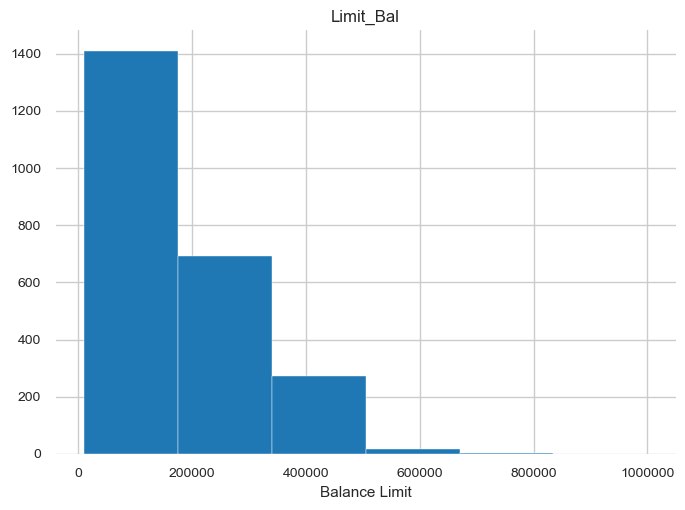

In [127]:
pd.DataFrame(yMA).hist(bins=6)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [128]:
cut_labels = ['10,000', '50,000', '140,000', '230,000', '1.000,000']
cut_bins = [0, 10000, 50000, 140000, 230000, 1000000]
yMA= pd.cut(credit['Limit_Bal'], bins=cut_bins, labels=cut_labels)

<AxesSubplot:>

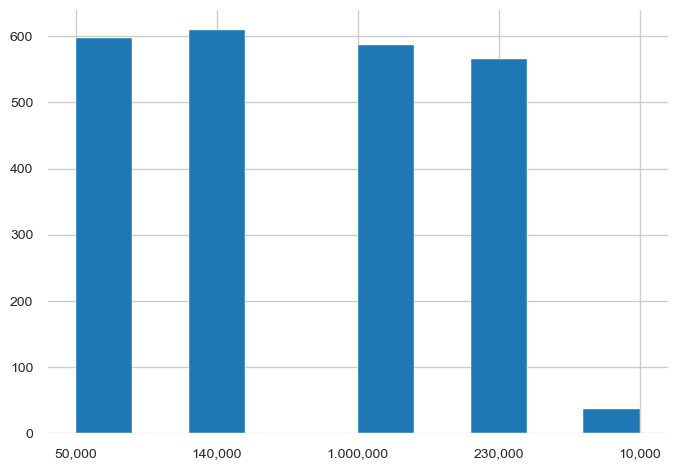

In [129]:
yMA.hist()

In [130]:
yMA = yMA.cat.codes

In [131]:
yMA = yMA.values.reshape(-1,1)

In [132]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XMA, yMA,test_size = 0.3, random_state=123)


In [134]:
#DecisionTreeClassifier
algo_MA1= DecisionTreeClassifier(max_depth=10, )
model_MA1 = algo_MA1.fit(x_train,y_train)
#Predictions
preds_MA1 = algo_MA1.predict(x_test)
print(classification_report(y_test, preds_MA1,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       0.35      0.36      0.36       173
           2       0.25      0.22      0.24       190
           3       0.22      0.15      0.18       180
           4       0.31      0.46      0.37       169

    accuracy                           0.29       719
   macro avg       0.43      0.24      0.23       719
weighted avg       0.29      0.29      0.28       719



In [135]:
#RandomForestClassifier
algo_MA2= RandomForestClassifier(max_depth=20, )
model_MA2 = algo_MA2.fit(x_train,y_train.ravel())
#Predictions
preds_MA2 = algo_MA2.predict(x_test)
print(classification_report(y_test, preds_MA2,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       0.36      0.34      0.35       173
           2       0.26      0.23      0.24       190
           3       0.23      0.18      0.20       180
           4       0.32      0.47      0.38       169

    accuracy                           0.30       719
   macro avg       0.43      0.24      0.23       719
weighted avg       0.30      0.30      0.29       719



In [136]:
#RandomForestClassifier
algo_MA3= GradientBoostingClassifier() 
model_MA3 = algo_MA3.fit(x_train,y_train.ravel())
#Predictions
preds_MA3 = algo_MA3.predict(x_test)
print(classification_report(y_test, preds_MA3,zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       0.38      0.38      0.38       173
           2       0.30      0.23      0.26       190
           3       0.17      0.08      0.11       180
           4       0.28      0.53      0.37       169

    accuracy                           0.30       719
   macro avg       0.43      0.24      0.22       719
weighted avg       0.29      0.30      0.27       719



In [138]:
print(cross_val_score(model_MA1, XMA, yMA.ravel(), cv=5 )) # cv = number of folds being held out

[0.29791667 0.3006263  0.33611691 0.34029228 0.29853862]


In [139]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [140]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [141]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XMA,yMA.ravel())
    results.append(result)
    names.append(name)

In [142]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.3167814892136395
Decision Tree Classifier 0.316365692414753
Gradient Bossting Class 0.3284742519137091


# Changing labels differently for the same algorithms

In [145]:
cut_labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-1MIL']
cut_bins = [9999, 180000, 300000,450000, 600000,1000000]
yMA= pd.cut(credit['Limit_Bal'], bins=cut_bins, labels=cut_labels)

In [147]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XMA, yMA,test_size = 0.3, random_state=123)

In [148]:
#DecisionTreeClassifier
algo_MA1= DecisionTreeClassifier(max_depth=20, )
model_MA1 = algo_MA1.fit(x_train,y_train)
#Predictions
preds_MA1 = algo_MA1.predict(x_test)
print(classification_report(y_test, preds_MA1,zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      0.96      0.75       444
   180K-300K       0.20      0.03      0.05       172
   300K-450K       0.00      0.00      0.00        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       1.00      0.00      0.00         2

    accuracy                           0.60       719
   macro avg       0.36      0.20      0.16       719
weighted avg       0.43      0.60      0.48       719



In [149]:
#RandomForestClassifier
algo_MA2= RandomForestClassifier(max_depth=20, )
model_MA2 = algo_MA2.fit(x_train,y_train.ravel())
#Predictions
preds_MA2 = algo_MA2.predict(x_test)
print(classification_report(y_test, preds_MA2,zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      0.93      0.74       444
   180K-300K       0.25      0.08      0.12       172
   300K-450K       0.00      0.00      0.00        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       1.00      0.00      0.00         2

    accuracy                           0.59       719
   macro avg       0.37      0.20      0.17       719
weighted avg       0.44      0.59      0.49       719



In [150]:
#RandomForestClassifier
algo_MA3= GradientBoostingClassifier() 
model_MA3 = algo_MA3.fit(x_train,y_train.ravel())
#Predictions
preds_MA3 = algo_MA3.predict(x_test)
print(classification_report(y_test, preds_MA3,zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      0.97      0.75       444
   180K-300K       0.19      0.02      0.04       172
   300K-450K       0.00      0.00      0.00        76
   45OK-600K       1.00      0.00      0.00        25
   600K-1MIL       1.00      0.00      0.00         2

    accuracy                           0.60       719
   macro avg       0.56      0.20      0.16       719
weighted avg       0.46      0.60      0.47       719



In [151]:
print(cross_val_score(model_MA1, XMA, yMA.ravel(), cv=5 )) # cv = number of folds being held out

[0.62083333 0.61169102 0.60960334 0.60542797 0.60334029]


In [152]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))

In [153]:
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [154]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XMA,yMA.ravel())
    results.append(result)
    names.append(name)

In [155]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6039231036882394
Decision Tree Classifier 0.6101791927627
Gradient Bossting Class 0.6181132567849686


# Predictive

In [156]:
#DecisionTreeClassifier
DT=algo_MA1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.5994436717663422

In [157]:
#RandomForestClassifier
RF=algo_MA2
RF.fit(x_train, y_train.ravel())
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.588317107093185

In [158]:
#GradientBoostingClassifier
GB=algo_MA3
GB.fit(x_train, y_train.ravel())
predictions = GB.predict(x_test)
GB.score(x_test, y_test)

0.6022253129346314

# 2 Predicting Accuracy with DT, RFC and GBC, Limit_Bal as dependant, 5 bins Acc ~ 62

In [159]:
XL= credit[['Default_Status_default','Marriage', 'Age']]
yL = credit['Limit_Bal']

Text(0.5, 0, 'Balance Limit')

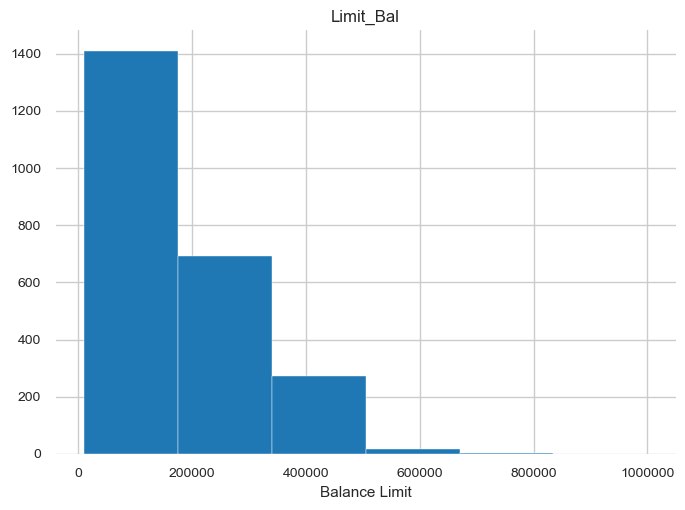

In [160]:
pd.DataFrame(yL).hist(bins=6)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [161]:
yL= pd.cut(yL, bins=[9999, 180000, 300000,450000, 600000,1000000], 
           labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-1MIL'])

<AxesSubplot:>

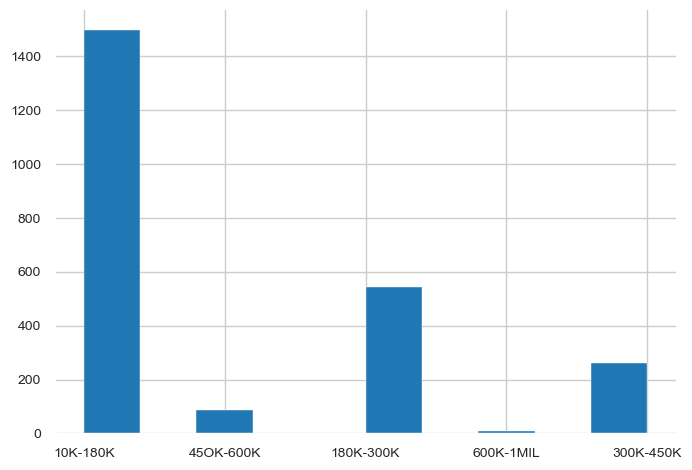

In [162]:
yL.hist()

In [163]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL, yL,test_size = 0.3, random_state=123)

In [164]:
#DecisionTreeClassifier
algo_LB1= DecisionTreeClassifier(max_depth=20, )
model_LB1 = algo_LB1.fit(x_train,y_train)
#Predictions
preds_LB1 = algo_LB1.predict(x_test)
print(classification_report(y_test, preds_LB1, zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      0.92      0.74       444
   180K-300K       0.29      0.10      0.15       172
   300K-450K       0.00      0.00      0.00        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       1.00      0.00      0.00         2

    accuracy                           0.59       719
   macro avg       0.38      0.20      0.18       719
weighted avg       0.46      0.59      0.50       719



In [165]:
#RandomForestClassifier
algo_LB2= RandomForestClassifier(max_depth=20, )
model_LB2 = algo_LB2.fit(x_train,y_train)
#Predictions
preds_LB2 = algo_LB2.predict(x_test)
print(classification_report(y_test, preds_LB2, zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.63      0.89      0.73       444
   180K-300K       0.26      0.12      0.17       172
   300K-450K       0.20      0.01      0.02        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       1.00      0.00      0.00         2

    accuracy                           0.58       719
   macro avg       0.42      0.20      0.18       719
weighted avg       0.47      0.58      0.50       719



In [166]:
#GradientBoostingClassifier
algo_LB3= GradientBoostingClassifier( )
model_LB3 = algo_LB3.fit(x_train,y_train)
#Predictions
preds_LB3 = algo_LB3.predict(x_test)
print(classification_report(y_test, preds_LB3,zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.62      0.98      0.76       444
   180K-300K       0.27      0.02      0.04       172
   300K-450K       0.00      0.00      0.00        76
   45OK-600K       1.00      0.00      0.00        25
   600K-1MIL       1.00      0.00      0.00         2

    accuracy                           0.61       719
   macro avg       0.58      0.20      0.16       719
weighted avg       0.48      0.61      0.48       719



In [167]:
print(cross_val_score(model_LB1, XL, yL )) # cv = number of folds being held out

[0.60208333 0.60542797 0.60960334 0.59916493 0.60334029]


In [169]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [170]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL,yL)
    results.append(result)
    names.append(name)

In [171]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6001678844815588
Decision Tree Classifier 0.6039239735560196
Gradient Bossting Class 0.6135273138482951


# Predictive Variables

In [172]:
#DecisionTreeClassifier
DT=algo_LB1
DT.fit(x_train, y_train)

predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.5924895688456189

In [173]:
#RandomForestClassifier
RF=algo_LB2
RF.fit(x_train, y_train)

predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.5730180806675939

In [174]:
#GradientBoostingClassifier
GB=algo_LB3
GB.fit(x_train, y_train)

predictions = GB.predict(x_test)
GB.score(x_test, y_test)

0.60778859527121

# 3. Predicting Accuracy with DT, RFC and GBC, Limit_Bal as dependant, 7 bins, independant a lot Acc . 62

In [176]:
credit.dtypes.index

Index(['Limit_Bal', 'Marriage', 'Age', 'Status_Sept', 'Status_Aug',
       'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Apr', 'Bill_Sept',
       'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'Pay_Sept',
       'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university', 'Default_Status_default',
       'Default_Status_not default'],
      dtype='object')

In [177]:


#features
XL1 = credit[['Marriage', 'Age', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university',
       'Default_Status_default']]

In [178]:
yL1 = credit['Limit_Bal']

Text(0.5, 0, 'Balance Limit')

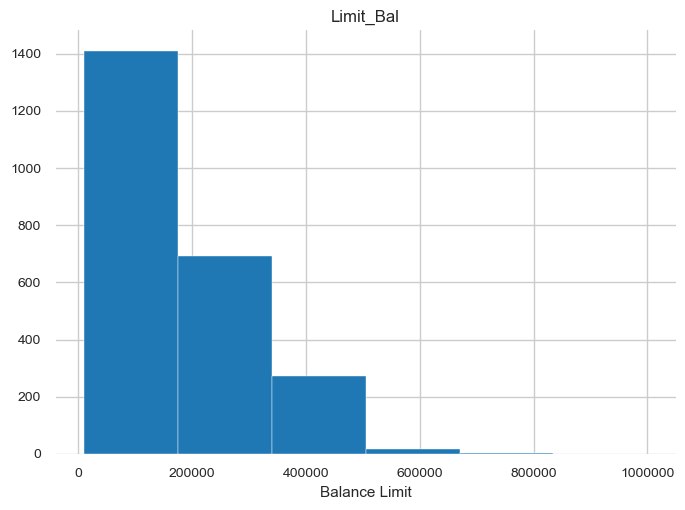

In [179]:
pd.DataFrame(yL1).hist(bins=6)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 

In [180]:
yL1= pd.cut(yL1, bins=[9999, 180000, 300000,450000, 600000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-1MIL'])

<AxesSubplot:>

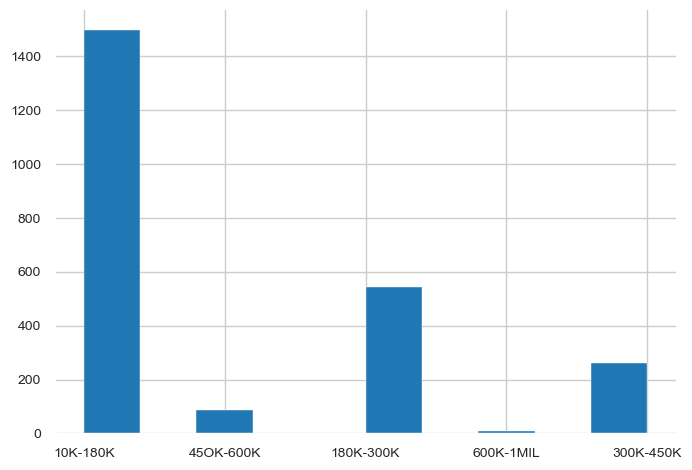

In [181]:
yL1.hist()

In [183]:
yL1 = yL1.ravel()

In [185]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL1, yL1,test_size = 0.3, random_state=123)

In [186]:
#DecisionTreeClassifier
algo_XL1= DecisionTreeClassifier(max_depth=20, )
model_XL1 = algo_XL1.fit(x_train,y_train.ravel())
#Predictions
preds_XL1 = algo_XL1.predict(x_test)
print(classification_report(y_test, preds_XL1, zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.65      0.84      0.73       444
   180K-300K       0.34      0.22      0.26       172
   300K-450K       0.19      0.07      0.10        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       0.00      0.00      0.00         2

    accuracy                           0.58       719
   macro avg       0.23      0.22      0.22       719
weighted avg       0.50      0.58      0.53       719



In [187]:
#RandomForestClassifier
algo_XL2= RandomForestClassifier(max_depth=20, )
model_XL2 = algo_XL2.fit(x_train,y_train.ravel())
#Predictions
preds_XL2 = algo_XL2.predict(x_test)
print(classification_report(y_test, preds_XL2,zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.65      0.80      0.72       444
   180K-300K       0.30      0.22      0.26       172
   300K-450K       0.16      0.09      0.12        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       0.00      0.00      0.00         2

    accuracy                           0.56       719
   macro avg       0.22      0.22      0.22       719
weighted avg       0.49      0.56      0.52       719



In [189]:
#GradientBoostingClassifier
algo_XL3= GradientBoostingClassifier(max_depth=20, )
model_XL3 = algo_XL3.fit(x_train,y_train.ravel())
#Predictions
preds_XL3 = algo_XL3.predict(x_test)
print(classification_report(y_test, preds_XL3, zero_division=1))

              precision    recall  f1-score   support

    10K-180K       0.65      0.84      0.73       444
   180K-300K       0.31      0.19      0.24       172
   300K-450K       0.17      0.07      0.10        76
   45OK-600K       0.00      0.00      0.00        25
   600K-1MIL       0.00      0.00      0.00         2

    accuracy                           0.57       719
   macro avg       0.23      0.22      0.21       719
weighted avg       0.49      0.57      0.52       719



In [190]:
print(cross_val_score(model, XL1, yL1.ravel())) # cv = number of folds being held out

[0.625      0.63465553 0.63048017 0.62212944 0.64091858]


In [191]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [192]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL1,yL1.ravel())
    results.append(result)
    names.append(name)

In [193]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5755488865692415
Decision Tree Classifier 0.5930758524704245
Gradient Bossting Class 0.6327200765483646


In [194]:
#DecisionTreeClassifier
DT=algo_XL1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.5799721835883171

In [195]:
#RandomForestClassifier
RF=algo_XL2
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.5563282336578581

In [196]:
#RandomForestClassifier
GB=algo_XL3
GB.fit(x_train, y_train)
predictions = GB.predict(x_test)
RF.score(x_test, y_test)

0.5563282336578581

In [197]:
#features
XL5 = credit.iloc[:, 2:-2]
yL5 = credit['Default_Status_default'].values.reshape(-1,1)

In [198]:
lim_cats= credit['Limit_Bal']
lim_cats= pd.cut(lim_cats, bins=[9999, 180000, 300000,450000, 600000,800000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-8OOK', '800K-1MIL'])

lim_cats=lim_cats.cat.codes

In [199]:
XL5['Limit_Bal']=lim_cats

In [200]:
trainX, testX, trainY, testY = train_test_split(XL5,yL5, test_size=0.3, random_state=42)

In [201]:
rfc = RandomForestClassifier()
rfc_model = rfc.fit(trainX, trainY.ravel())
rfc_model.score(testX, testY)

0.8094575799721836

Text(0.5, 0, 'Balance Limit')

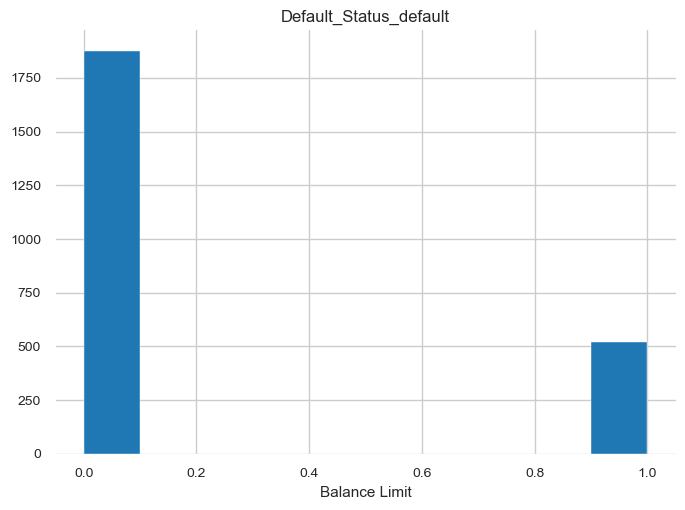

In [208]:
#features
XL2 = credit['Limit_Bal']
yL2 = credit['Default_Status_default']
pd.DataFrame(yL2).hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Balance Limit') 



In [209]:

XL2= pd.cut(XL2, bins=[9999, 180000, 300000,450000, 600000,800000,1000000],
            labels = ['10K-180K', '180K-300K','300K-450K', '45OK-600K', '600K-8OOK', '800K-1MIL'])

In [210]:
XL2 = XL2.cat.codes

<AxesSubplot:>

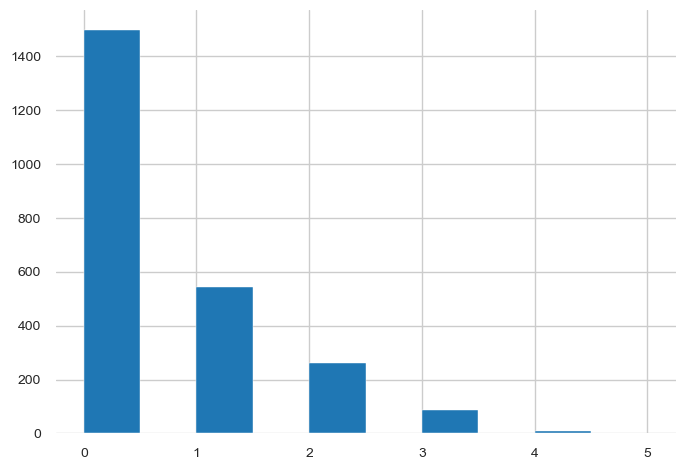

In [211]:
XL2.hist()

In [212]:
XL2 = XL2.values.reshape(-1,1)

In [213]:
x_train, x_test, y_train, y_test = train_test_split(XL2, yL2,test_size = 0.3, random_state=123)

In [214]:
#DecisionTreeClassifier
algo_XLD1= DecisionTreeClassifier(max_depth=20, )
model_XLD1 = algo_XLD1.fit(x_train,y_train)
#Predicti1ons
preds_XLD1 = algo_XLD1.predict(x_test)
print(classification_report(y_test, preds_XLD1,zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       1.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.90      0.50      0.44       719
weighted avg       0.84      0.80      0.70       719



In [215]:
#RandomForestClassifier
algo_XLD2= RandomForestClassifier(max_depth=20, )
model_XLD2 = algo_XLD2.fit(x_train,y_train)
#Predicti1ons
preds_XLD2 = algo_XLD2.predict(x_test)
print(classification_report(y_test, preds_XLD2,zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       1.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.90      0.50      0.44       719
weighted avg       0.84      0.80      0.70       719



In [216]:
#GradientBoostingClassifier
algo_XLD3= GradientBoostingClassifier(max_depth=20, )
model_XLD3 = algo_XLD3.fit(x_train,y_train)
#Predicti1ons
preds_XLD3 = algo_XLD3.predict(x_test)
print(classification_report(y_test, preds_XLD3,zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       1.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.90      0.50      0.44       719
weighted avg       0.84      0.80      0.70       719



In [217]:
print(cross_val_score(model, XL2, yL2)) # cv = number of folds being held out

[0.78333333 0.782881   0.782881   0.782881   0.78496868]


In [218]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [219]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL2,yL2)
    results.append(result)
    names.append(name)
results

[array([0.78333333, 0.782881  , 0.782881  , 0.782881  , 0.78496868]),
 array([0.78333333, 0.782881  , 0.782881  , 0.782881  , 0.78496868]),
 array([0.78333333, 0.782881  , 0.782881  , 0.782881  , 0.78496868])]

In [220]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7833890048712595
Decision Tree Classifier 0.7833890048712595
Gradient Bossting Class 0.7833890048712595


In [221]:
#DecisionTreeClassifier
DT=algo_XLD1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.7955493741307371

In [222]:
#RandomForestClassifier
RF=algo_XLD2
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.7955493741307371

In [223]:
#RandomForestClassifier
GB=algo_XLD3
GB.fit(x_train, y_train)
predictions = GB.predict(x_test)
RF.score(x_test, y_test)

0.7955493741307371

# 5. Credit limit is independent and not descritize .78

In [224]:
XL3 = credit['Limit_Bal'].values.reshape(-1,1)
yL3 = credit['Default_Status_default']

Text(0.5, 0, '0- Not default    1- Default')

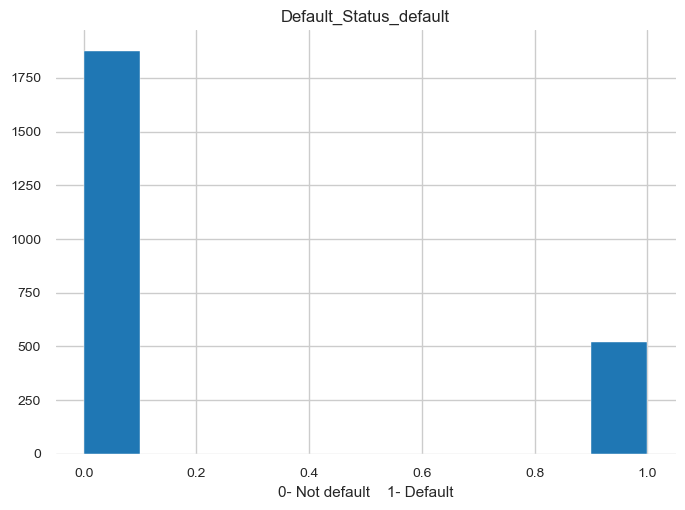

In [225]:
pd.DataFrame(yL3).hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('0- Not default    1- Default') 

In [226]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(XL3, yL3,test_size = 0.3, random_state=123)

In [227]:
#DecisionTreeClassifier
algo_XLND1= DecisionTreeClassifier(max_depth=2)
model_XLND1 = algo_XLND1.fit(x_train,y_train)
#Predicti1ons
preds_XLND1 = algo_XLND1.predict(x_test)
print(classification_report(y_test, preds_XLND1, zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       1.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.90      0.50      0.44       719
weighted avg       0.84      0.80      0.70       719



In [228]:
#RandomForestClassifier
algo_XLND2= RandomForestClassifier(max_depth=4)
model_XLND2 = algo_XLND2.fit(x_train,y_train)
#Predicti1ons
preds_XLND2 = algo_XLND2.predict(x_test)
print(classification_report(y_test, preds_XLND2,zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       1.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.90      0.50      0.44       719
weighted avg       0.84      0.80      0.70       719



In [229]:
#GradientBoostingClassifier
algo_XLND3= GradientBoostingClassifier()
model_XLND3 = algo_XLND3.fit(x_train,y_train)
#Predicti1ons
preds_XLND3= algo_XLND3.predict(x_test)
print(classification_report(y_test, preds_XLND3, zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       572
           1       1.00      0.00      0.00       147

    accuracy                           0.80       719
   macro avg       0.90      0.50      0.44       719
weighted avg       0.84      0.80      0.70       719



In [230]:
print(cross_val_score(model, XL3, yL3)) # cv = number of folds being held out

[0.78333333 0.782881   0.782881   0.77870564 0.782881  ]


In [231]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Bossting Class', GradientBoostingClassifier()))
algos_Class

[('Random Forest Classifier', RandomForestClassifier()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Gradient Bossting Class', GradientBoostingClassifier())]

In [232]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, XL2,yL2)
    results.append(result)
    names.append(name)
results

[array([0.78333333, 0.782881  , 0.782881  , 0.782881  , 0.78496868]),
 array([0.78333333, 0.782881  , 0.782881  , 0.782881  , 0.78496868]),
 array([0.78333333, 0.782881  , 0.782881  , 0.782881  , 0.78496868])]

In [233]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.7833890048712595
Decision Tree Classifier 0.7833890048712595
Gradient Bossting Class 0.7833890048712595


In [234]:
#DecisionTreeClassifier
DT=algo_XLND1
DT.fit(x_train, y_train)
predictions = DT.predict(x_test)
DT.score(x_test, y_test)

0.7955493741307371

In [235]:
#RandomForestClassifier
RF=algo_XLND2
RF.fit(x_train, y_train)
predictions = RF.predict(x_test)
RF.score(x_test, y_test)

0.7955493741307371

In [236]:
#RandomForestClassifier
GB=algo_XLND3
GB.fit(x_train, y_train)
predictions = GB.predict(x_test)
RF.score(x_test, y_test)

0.7955493741307371

# Regression Models Defaul PMT is dependant, will not work b/c it is binary variable

In [237]:
credit.dtypes.index

Index(['Limit_Bal', 'Marriage', 'Age', 'Status_Sept', 'Status_Aug',
       'Status_Jul', 'Status_Jun', 'Status_May', 'Status_Apr', 'Bill_Sept',
       'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'Pay_Sept',
       'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr', 'Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university', 'Default_Status_default',
       'Default_Status_not default'],
      dtype='object')

In [238]:
#features
X = credit[['Limit_Bal', 'Marriage', 'Age','Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university']]
print('Summary of feature sample')

Summary of feature sample


In [239]:
y= credit['Default_Status_default']

In [243]:
#in first line we only initialize the parameters
modelD1 = LinearRegression(n_jobs=15)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)
modelD1.fit(X_train, y_train)
modelD1.score(X_test, y_test)

-0.0009974281859099765

In [244]:
modelD2 = RandomForestRegressor(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)
modelD2.fit(X_train, y_train)
modelD2.score(X_test, y_test)

-0.25830673009502014

In [245]:
modelD3 = SVR()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 123)
modelD3.fit(X_train, y_train)
modelD3.score(X_test, y_test)

-0.06737514096320152

In [247]:
print(cross_val_score(modelD1, X, y, cv=5, )) # cv = number of folds being held out

[-0.00216866 -0.00114337  0.00692299  0.01449225  0.00978226]


In [248]:
model = []
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Linear Regression',LinearRegression()))
model.append(('Support Vector Regression',SVR()))

In [249]:
#classification
results = []
names = []
for name, model in model:
    result = cross_val_score(model, X,y)
    results.append(result)
    names.append(name)

In [250]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.23680930432472716
Linear Regression 0.005577095917777197
Support Vector Regression -0.08085398674032826


In [251]:
#Make Predictions
predictionsD1 = modelD1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.257
RMSE: 0.452


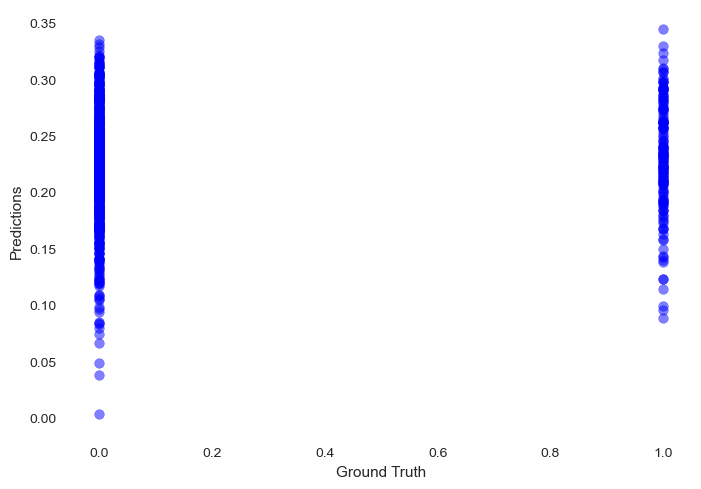

In [252]:
plt.scatter(y_test, predictionsD1, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [253]:
#Make Predictions
predictionsD2 = modelD2.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.257
RMSE: 0.452


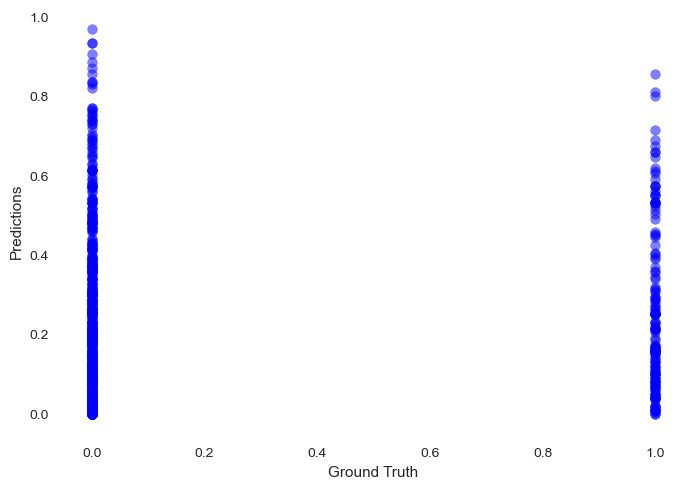

In [254]:
plt.scatter(y_test, predictionsD2, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Regression Models no Marriage - Predicting Default Payment

In [256]:
#features

Xm = credit[['Limit_Bal', 'Age','Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university']]
print('Summary of feature sample')
Xm.head()

Summary of feature sample


,Limit_Bal,Age,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university
0,20000,24,1,0,0,0,0,1
1,120000,26,1,0,0,0,0,1
2,90000,34,1,0,0,0,0,1
3,50000,37,1,0,0,0,0,1
4,50000,57,0,1,0,0,0,1


In [257]:
ym= credit['Default_Status_default']

In [258]:
model = LinearRegression(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,test_size = 0.3, random_state = 123)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.003453253378950749

In [259]:
model = RandomForestRegressor(n_jobs=10)
#train test split
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,test_size = 0.3, random_state = 123)
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.32932149813628797

In [260]:
model = SVR()
X_train, X_test, y_train, y_test = train_test_split(Xm, ym,test_size = 0.3, random_state = 123)
model.fit(X_train, y_train)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
model.score(X_test, y_test)

-0.06738314548704105

In [261]:
print(cross_val_score(model, Xm, ym, cv=5, )) # cv = number of folds being held out

[-0.09927769 -0.04673424 -0.08317514 -0.08563684 -0.08978066]


In [271]:
model = []
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Linear Regression',LinearRegression()))
model.append(('Support Vector Regression',SVR()))


In [272]:
#classification
results = []
names = []
for name, model in model:
    result = cross_val_score(model, Xm,ym)
    results.append(result)
    names.append(name)

In [273]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor -0.2819275440316565
Linear Regression 0.005547255216346381
Support Vector Regression -0.08092091376894653


# Regression

In [274]:
#features
Xl = credit[['Marriage', 'Age','Sex_female',
       'Sex_male', 'Education_graduate school', 'Education_high school',
       'Education_other', 'Education_university','Default_Status_default']]


print('Summary of feature sample')
Xl.head()

Summary of feature sample


,Marriage,Age,Sex_female,Sex_male,Education_graduate school,Education_high school,Education_other,Education_university,Default_Status_default
0,1,24,1,0,0,0,0,1,1
1,2,26,1,0,0,0,0,1,1
2,2,34,1,0,0,0,0,1,0
3,1,37,1,0,0,0,0,1,0
4,1,57,0,1,0,0,0,1,0


In [275]:
yl= credit[  'Limit_Bal']

In [276]:
model1 = LinearRegression(n_jobs=10)
#train test split
x_train, x_test, y_train, y_test = train_test_split(Xl, yl,test_size = 0.3, random_state = 123)
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.1233296272672827

In [279]:
model2 = RandomForestRegressor(n_jobs=10)
#train test split
x_train, x_test, y_train, y_test = train_test_split(Xl, yl,test_size = 0.3, random_state = 123)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.021083379253970858

In [280]:
model3 = SVR()
X_train, X_test, y_train, y_test = train_test_split(Xl, yl,test_size = 0.3, random_state = 123)
model3.fit(X_train, y_train)
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
model3.score(X_test, y_test)

-0.045235139621363496

In [281]:
print(cross_val_score(model, Xl, yl, cv=5, )) 
#this gives you r2 because its a smart function and we run regression model# cv = number of folds being held out 

[-0.05772982 -0.02860702 -0.05437897 -0.0296234  -0.03285382]


In [282]:
model = []
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Linear Regression',LinearRegression()))
model.append(('Support Vector Regression',SVR()))

In [283]:
#classification
results = []
names = []
for name, model in model:
    result = cross_val_score(model, Xl,yl)
    results.append(result)
    names.append(name)

In [284]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.021275839119786744
Linear Regression 0.11200030871196501
Support Vector Regression -0.040638606468480276


In [285]:
#Make Predictions
predictions = model1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.123
RMSE: 121225.242


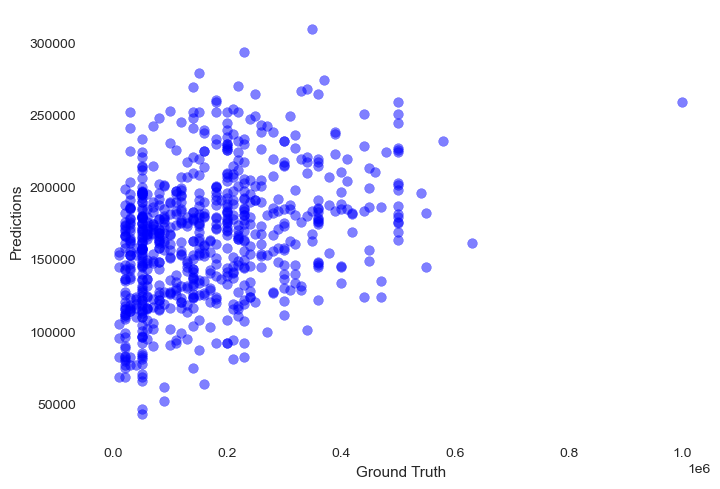

In [286]:
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [287]:
#Make Predictions
predictions2 = model2.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.123
RMSE: 121225.242


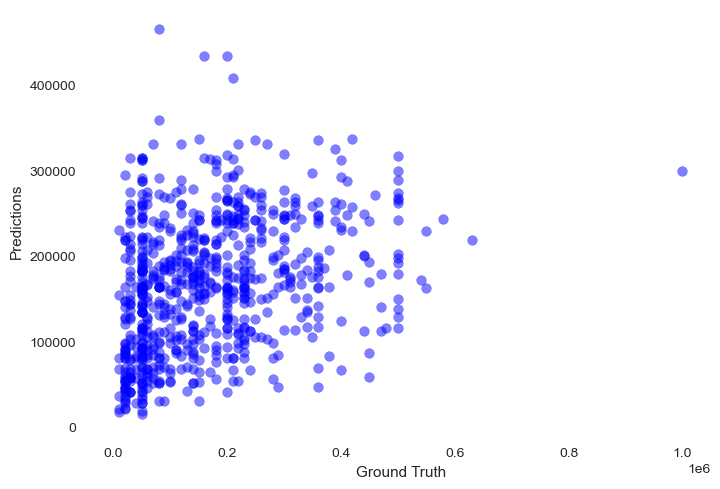

In [288]:
plt.scatter(y_test, predictions2, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [289]:
#Make Predictions
predictions3 = model3.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.123
RMSE: 121225.242


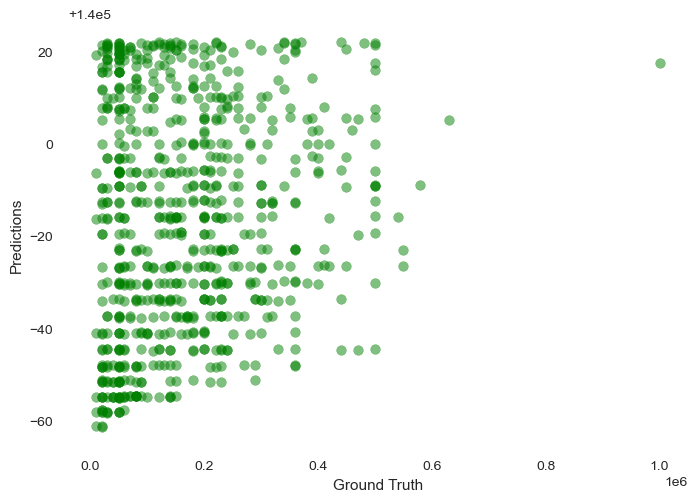

In [290]:
plt.scatter(y_test, predictions3, color=['green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();